In [3]:
# Generic ones
import numpy as np
import pandas as pd
import os

# Word processing libraries
import re
from nltk.corpus import wordnet
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

# Widen the size of each cell
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [4]:
import glob
import gzip

# dfs=[]
data = None
total_count=0
keywords_str='#chinavirus|#wuhanvirus|#chopstickflu|#kungfuvirus|#chinesevirus|#kungflu'
print('filtering by:', keywords_str)

for file in glob.glob("E:\\Projects\\twitter_covid\\2020-01\\*.gz"):
    print(file)
    df = pd.read_json(path_or_buf=file, lines=True, compression='infer')
#     print('Read. Size: ', df.shape)
    
    total_count+=df.shape[0]
    df = df[df['full_text'].str.contains("(?i)"+keywords_str)]
    df.reset_index(inplace = True, drop = True)
    if data is None:
        data = df
    else:
        data = pd.concat([data, df], axis = 0)
        # Reset_index
        data.reset_index(inplace = True, drop = True)
        
data_orig=data.copy()

print('Size of dataset before filtering:', total_count)
print('Size of dataset after filtering:', data.shape[0])



filtering by: #chinavirus|#wuhanvirus|#chopstickflu|#kungfuvirus|#chinesevirus|#kungflu
E:\Projects\twitter_covid\2020-01\coronavirus-tweet-id-2020-01-21-22.jsonl.gz
E:\Projects\twitter_covid\2020-01\coronavirus-tweet-id-2020-01-21-23.jsonl.gz
E:\Projects\twitter_covid\2020-01\coronavirus-tweet-id-2020-01-22-00.jsonl.gz
E:\Projects\twitter_covid\2020-01\coronavirus-tweet-id-2020-01-22-01.jsonl.gz
E:\Projects\twitter_covid\2020-01\coronavirus-tweet-id-2020-01-22-02.jsonl.gz
E:\Projects\twitter_covid\2020-01\coronavirus-tweet-id-2020-01-22-03.jsonl.gz
E:\Projects\twitter_covid\2020-01\coronavirus-tweet-id-2020-01-22-04.jsonl.gz
E:\Projects\twitter_covid\2020-01\coronavirus-tweet-id-2020-01-22-05.jsonl.gz
E:\Projects\twitter_covid\2020-01\coronavirus-tweet-id-2020-01-22-06.jsonl.gz
E:\Projects\twitter_covid\2020-01\coronavirus-tweet-id-2020-01-22-07.jsonl.gz
E:\Projects\twitter_covid\2020-01\coronavirus-tweet-id-2020-01-22-08.jsonl.gz
E:\Projects\twitter_covid\2020-01\coronavirus-tweet-id

In [5]:
data['hashtags'] = data['entities'].apply(lambda x: x['hashtags'])
data['hashtags'].head(3)

0    [{'text': 'Wuhan', 'indices': [91, 97]}, {'tex...
1    [{'text': 'Wuhanvirus', 'indices': [66, 77]}, ...
2    [{'text': 'wuhanvirus', 'indices': [47, 58]}, ...
Name: hashtags, dtype: object

In [6]:
# Remove empty tweets
data.dropna(subset = ['full_text'], inplace = True)
# The unicode accounts for Chinese characters and punctuations.
def strip_chinese_words(string):
    # list of english words
    en_list = re.findall(u'[^\u4E00-\u9FA5\u3000-\u303F]', str(string))
    
    # Remove word from the list, if not english
    for c in string:
        if c not in en_list:
            string = string.replace(c, '')
    return string
# Apply strip_chinese_words(...) on the column 'text'
data['full_text'] = data['full_text'].apply(lambda x: strip_chinese_words(x))
data.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,...,quoted_status_id,quoted_status_id_str,quoted_status_permalink,possibly_sensitive,extended_entities,quoted_status,withheld_in_countries,withheld_scope,withheld_copyright,hashtags
0,2020-01-22 01:32:42+00:00,1219794987451158528,1219794987451158528,“The patient became ill *four days* after arri...,False,"[0, 151]","{'hashtags': [{'text': 'Wuhan', 'indices': [91...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,"[{'text': 'Wuhan', 'indices': [91, 97]}, {'tex..."
1,2020-01-22 01:59:20+00:00,1219801689336664064,1219801689336664064,@Laurie_Garrett @MackayIM The public is unders...,False,"[26, 116]","{'hashtags': [{'text': 'Wuhanvirus', 'indices'...","<a href=""https://mobile.twitter.com"" rel=""nofo...",1.219767e+18,1.219767e+18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'text': 'Wuhanvirus', 'indices': [66, 77]}, ..."
2,2020-01-22 03:06:12+00:00,1219818516473270273,1219818516473270272,wear face mask especially when you travelling\...,False,"[0, 103]","{'hashtags': [{'text': 'wuhanvirus', 'indices'...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'text': 'wuhanvirus', 'indices': [47, 58]}, ..."
3,2020-01-22 03:36:40+00:00,1219826185049231360,1219826185049231360,The actual numbers could be x10 or x100 or eve...,False,"[0, 129]","{'hashtags': [{'text': 'wuhanvirus', 'indices'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'text': 'wuhanvirus', 'indices': [62, 73]}, ..."
4,2020-01-22 03:51:43+00:00,1219829972728070144,1219829972728070144,RT @thepointwithlx: Prof. Leung who worked aga...,False,"[0, 139]","{'hashtags': [{'text': 'wuhanvirus', 'indices'...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'text': 'wuhanvirus', 'indices': [127, 138]}]"


In [7]:
# Define function to sieve out @users in a tweet:
def mentioned_users(string):
    usernames = re.findall('@[^\s]+', string)
    return usernames
# Create a new column and apply the function on the column 'text'
data['mentioned_users'] = data['full_text'].apply(lambda x: mentioned_users(x))
data.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,...,quoted_status_id_str,quoted_status_permalink,possibly_sensitive,extended_entities,quoted_status,withheld_in_countries,withheld_scope,withheld_copyright,hashtags,mentioned_users
0,2020-01-22 01:32:42+00:00,1219794987451158528,1219794987451158528,“The patient became ill *four days* after arri...,False,"[0, 151]","{'hashtags': [{'text': 'Wuhan', 'indices': [91...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,"[{'text': 'Wuhan', 'indices': [91, 97]}, {'tex...",[]
1,2020-01-22 01:59:20+00:00,1219801689336664064,1219801689336664064,@Laurie_Garrett @MackayIM The public is unders...,False,"[26, 116]","{'hashtags': [{'text': 'Wuhanvirus', 'indices'...","<a href=""https://mobile.twitter.com"" rel=""nofo...",1.219767e+18,1.219767e+18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'text': 'Wuhanvirus', 'indices': [66, 77]}, ...","[@Laurie_Garrett, @MackayIM]"
2,2020-01-22 03:06:12+00:00,1219818516473270273,1219818516473270272,wear face mask especially when you travelling\...,False,"[0, 103]","{'hashtags': [{'text': 'wuhanvirus', 'indices'...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'text': 'wuhanvirus', 'indices': [47, 58]}, ...",[]
3,2020-01-22 03:36:40+00:00,1219826185049231360,1219826185049231360,The actual numbers could be x10 or x100 or eve...,False,"[0, 129]","{'hashtags': [{'text': 'wuhanvirus', 'indices'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'text': 'wuhanvirus', 'indices': [62, 73]}, ...",[]
4,2020-01-22 03:51:43+00:00,1219829972728070144,1219829972728070144,RT @thepointwithlx: Prof. Leung who worked aga...,False,"[0, 139]","{'hashtags': [{'text': 'wuhanvirus', 'indices'...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'text': 'wuhanvirus', 'indices': [127, 138]}]",[@thepointwithlx:]


In [8]:
# Define Emoji_patterns
emoji_pattern = re.compile("["
         u"\U0001F600-\U0001F64F"  # emoticons
         u"\U0001F300-\U0001F5FF"  # symbols & pictographs
         u"\U0001F680-\U0001F6FF"  # transport & map symbols
         u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
         u"\U00002702-\U000027B0"
         u"\U000024C2-\U0001F251"
         "]+", flags=re.UNICODE)
# Define the function to implement POS tagging:
def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
# Define the main function to clean text in various ways:
def clean_text(text):
    
    # Apply regex expressions first before converting string to list of tokens/words:
    # 1. remove @usernames
    text = re.sub('@[^\s]+', '', text)
    
    # 2. remove URLs
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', '', text)
    
    # 3. remove hashtags entirely i.e. #hashtags
    text = re.sub(r'#([^\s]+)', '', text)
    
    # 4. remove emojis
    text = emoji_pattern.sub(r'', text)
    
    # 5. Convert text to lowercase
    text = text.lower()
    
    # 6. tokenise text and remove punctuation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    
    # 7. remove numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    
    # 8. remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    
    # 9. remove empty tokens
    text = [t for t in text if len(t) > 0]
    
    # 10. pos tag text and lemmatize text
    pos_tags = pos_tag(text)
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    
    # 11. remove words with only one letter
    text = [t for t in text if len(t) > 1]
    
    # join all
    text = " ".join(text)
    
    return(text)
# Apply function on the column 'text':
data['cleaned_text'] = data['full_text'].apply(lambda x: clean_text(x))
data.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,...,quoted_status_permalink,possibly_sensitive,extended_entities,quoted_status,withheld_in_countries,withheld_scope,withheld_copyright,hashtags,mentioned_users,cleaned_text
0,2020-01-22 01:32:42+00:00,1219794987451158528,1219794987451158528,“The patient became ill *four days* after arri...,False,"[0, 151]","{'hashtags': [{'text': 'Wuhan', 'indices': [91...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,"[{'text': 'Wuhan', 'indices': [91, 97]}, {'tex...",[],“the patient become ill four day arrive united...
1,2020-01-22 01:59:20+00:00,1219801689336664064,1219801689336664064,@Laurie_Garrett @MackayIM The public is unders...,False,"[26, 116]","{'hashtags': [{'text': 'Wuhanvirus', 'indices'...","<a href=""https://mobile.twitter.com"" rel=""nofo...",1.219767e+18,1.219767e+18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'text': 'Wuhanvirus', 'indices': [66, 77]}, ...","[@Laurie_Garrett, @MackayIM]",public understand easy etc
2,2020-01-22 03:06:12+00:00,1219818516473270273,1219818516473270272,wear face mask especially when you travelling\...,False,"[0, 103]","{'hashtags': [{'text': 'wuhanvirus', 'indices'...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'text': 'wuhanvirus', 'indices': [47, 58]}, ...",[],wear face mask especially travelling\n\n
3,2020-01-22 03:36:40+00:00,1219826185049231360,1219826185049231360,The actual numbers could be x10 or x100 or eve...,False,"[0, 129]","{'hashtags': [{'text': 'wuhanvirus', 'indices'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'text': 'wuhanvirus', 'indices': [62, 73]}, ...",[],actual number could even worse
4,2020-01-22 03:51:43+00:00,1219829972728070144,1219829972728070144,RT @thepointwithlx: Prof. Leung who worked aga...,False,"[0, 139]","{'hashtags': [{'text': 'wuhanvirus', 'indices'...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'text': 'wuhanvirus', 'indices': [127, 138]}]",[@thepointwithlx:],rt prof leung work sars give tip people may wo...


In [9]:
# Define a function to perform this extraction:
def extract_hashtags(hashtag_list):
    # argument:
    # hashtag_list - a list of dictionary(ies), each containing a hashtag
    
    # Create a list to store the hashtags
    hashtags = []
    if isinstance(hashtag_list, float):
        hashtag_list=[]
    
    # Loop through the list:
    for i in range(0, len(hashtag_list)):
        # extract the hashtag value using the key - 'text'
        # For our purposes, we can ignore the indices, which tell us the position of the hashtags in the string of tweet
        # lowercase the text as well
        hashtags.append(hashtag_list[i]['text'].lower())
        
    return hashtags
# Apply function on the column - data['hashtags']
data['hashtags'] = data['hashtags'].apply(lambda x: extract_hashtags(x))
# Check out the updated column 'hashtags'
print(data.head()['hashtags'])

0                  [wuhan, wuhanvirus, wuhanpneumonia]
1       [wuhanvirus, wuhancoronavirus, wuhanpneumonia]
2    [wuhanvirus, influenza, wuhancoronavirus, wuha...
3    [wuhanvirus, wuhancoronavirus, freehk, policet...
4                                         [wuhanvirus]
Name: hashtags, dtype: object


In [10]:
#Show hashtags
        
data[data['hashtags'].apply(lambda x: True if len(x)>0 else False)]['hashtags']

0                     [wuhan, wuhanvirus, wuhanpneumonia]
1          [wuhanvirus, wuhancoronavirus, wuhanpneumonia]
2       [wuhanvirus, influenza, wuhancoronavirus, wuha...
3       [wuhanvirus, wuhancoronavirus, freehk, policet...
4                                            [wuhanvirus]
                              ...                        
8742                                  [china, wuhanvirus]
8743                                  [china, wuhanvirus]
8744                              [coronoavirus, kungflu]
8745                                            [kungflu]
8746                                            [kungflu]
Name: hashtags, Length: 8745, dtype: object

In [11]:
data['location'] = df.user.apply(lambda x: x['location'])
data['acctdesc'] = df.user.apply(lambda x: x['description'])
data[['location','acctdesc']].head(3)

,location,acctdesc
0,,
1,,✧･ﾟ: *✧･ﾟ:* meow *:･ﾟ✧*:･ﾟ✧
2,,dazed and confused


In [12]:
# Replace NaN (empty) values with n.a to indicate that the user did not state his location
# Define a function to handle this:
def remove_nan(text):
    if pd.isnull(text) == True: # entry is NaN
        text = 'n.a'
    else:
        # lowercase text for possible easy handling
        text = text.lower()
        
    return text
# Apply function on column - data['location']
data['location'] = data['location'].apply(lambda x: remove_nan(x))
# Check out the updated columns
print(data.head()['location'])
# Let's take a quick look at the value_counts()
data['location'].value_counts()

0             
1             
2             
3    hong kong
4    hong kong
Name: location, dtype: object


n.a              8413
                  125
hong kong          15
malaysia           10
united states       5
                 ... 
lyon, france        1
johor               1
drowning            1
philly              1
wrocław             1
Name: location, Length: 162, dtype: int64

In [13]:
# Apply the function already defined above: remove_nan(...)
# Apply function on column - data['acctdesc']
data['acctdesc'] = data['acctdesc'].apply(lambda x: remove_nan(x))
# Check out the updated columns
print(data.head()['acctdesc'])

0                                                     
1                          ✧･ﾟ: *✧･ﾟ:* meow *:･ﾟ✧*:･ﾟ✧
2                                   dazed and confused
3    a hongkonger focusing on senate\n#standwithhon...
4    hongkonger\nlove games, love comic, love pixel...
Name: acctdesc, dtype: object


In [14]:
# Importing VADER from NLTK
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# Create a sid object called SentimentIntensityAnalyzer()
sid = SentimentIntensityAnalyzer()
# Apply polarity_score method of SentimentIntensityAnalyzer()
data['sentiment'] = data['cleaned_text'].apply(lambda x: sid.polarity_scores(x))
# Keep only the compound scores under the column 'Sentiment'
data = pd.concat([data.drop(['sentiment'], axis = 1), data['sentiment'].apply(pd.Series)], axis = 1)

In [15]:
# New column: number of characters in 'review'
data['numchars'] = data['cleaned_text'].apply(lambda x: len(x))
# New column: number of words in 'review'
data['numwords'] = data['cleaned_text'].apply(lambda x: len(x.split(" ")))
# Check the new columns:
data.tail(2)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,...,mentioned_users,cleaned_text,location,acctdesc,neg,neu,pos,compound,numchars,numwords
8745,2020-01-25 13:45:35+00:00,1221066587043717121,1221066587043717120,@DrEricDing @StefanMolyneux Everybody was #Kun...,False,"[28, 64]","{'hashtags': [{'text': 'KungFlu', 'indices': [...","<a href=""http://twitter.com/download/iphone"" r...",1.220920e+18,1.220920e+18,...,"[@DrEricDing, @StefanMolyneux]",everybody fight,n.a,n.a,0.722,0.278,0.000,-0.3818,15,2
8746,2020-01-25 13:47:35+00:00,1221067092541075456,1221067092541075456,Interesting story from the CBC from last summe...,False,"[0, 90]","{'hashtags': [{'text': 'KungFlu', 'indices': [...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,[],interest story cbc last summer make sense,n.a,n.a,0.000,0.667,0.333,0.4588,41,7


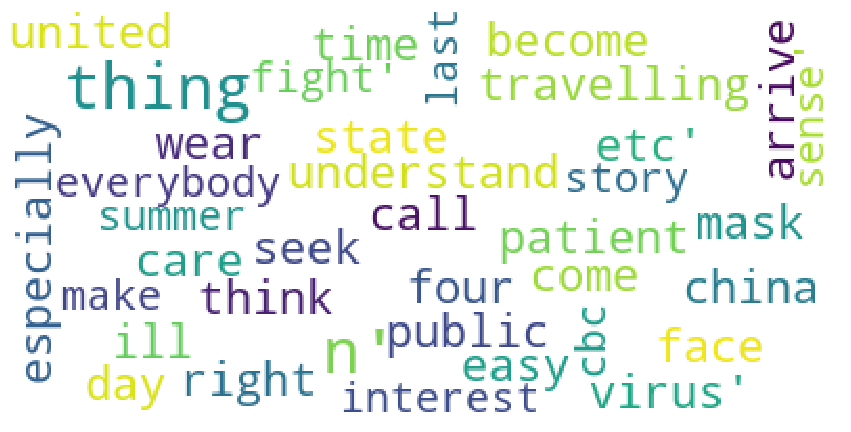

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 400,
        max_font_size = 30, 
        scale = 1,
        random_state = 1
    ).generate(str(data))
    fig = plt.figure(1, figsize = (15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)
    plt.imshow(wordcloud)
    plt.show()
    
show_wordcloud(data['cleaned_text'].values)

In [17]:
# the column data['hashtags'] returns a list of string(s) for each tweet. Build a list of all hashtags in the dataset.
hashtag_list = []
for i in range(0, len(data)):
    # Obtain the current list of hashtags
    curr_hashtag = data.iloc[i, :]['hashtags']
    
    # Extract and append the hashtags to 'hashtag_list':
    for j in range(0, len(curr_hashtag)):
        hashtag_list.append(curr_hashtag[j])
        
# No. of hashtags
print('No. of hashtags used in {} tweets is {}'.format(len(data), len(hashtag_list)))

df_hashtag = pd.DataFrame(
    {'hashtags': hashtag_list}
)
print(df_hashtag.head(20))
print('Shape of df_hashtag is:', df_hashtag.shape)

No. of hashtags used in 8747 tweets is 32015
            hashtags
0              wuhan
1         wuhanvirus
2     wuhanpneumonia
3         wuhanvirus
4   wuhancoronavirus
5     wuhanpneumonia
6         wuhanvirus
7          influenza
8   wuhancoronavirus
9     wuhanpneumonia
10        wuhanvirus
11  wuhancoronavirus
12            freehk
13   policeterrorism
14       policestate
15        wuhanvirus
16        wuhanvirus
17        wuhanvirus
18            latest
19             macau
Shape of df_hashtag is: (32015, 1)


                 hashtags  counts
1093           wuhanvirus    7223
1065                wuhan    3519
1071     wuhancoronavirus    3226
234           coronavirus    2350
156                 china    2323
1029                 wars    2154
175            chinavirus    1424
250   coronavirusoutbreak    1025
1075     wuhancoronovirus     621
1085       wuhanpneumonia     589
1149                 武汉肺炎     462
261          coronoavirus     371
1083        wuhanoutbreak     277
265           coronovirus     267
1090            wuhansars     249
228         coronarovirus     215
576               kungflu     193
1080        wuhanlockdown     157
1012                virus     124
821                  sars     123
169        chinapneumonia     121
1045                  who     114
112              breaking     110
226        coronaoutbreak      89
481              hongkong      86
664              ncov2019      77
823              sars2020      74
182               chinazi      73
406           

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 27494 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 27721 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 32954 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 28814 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 28450 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 30123 missing from c

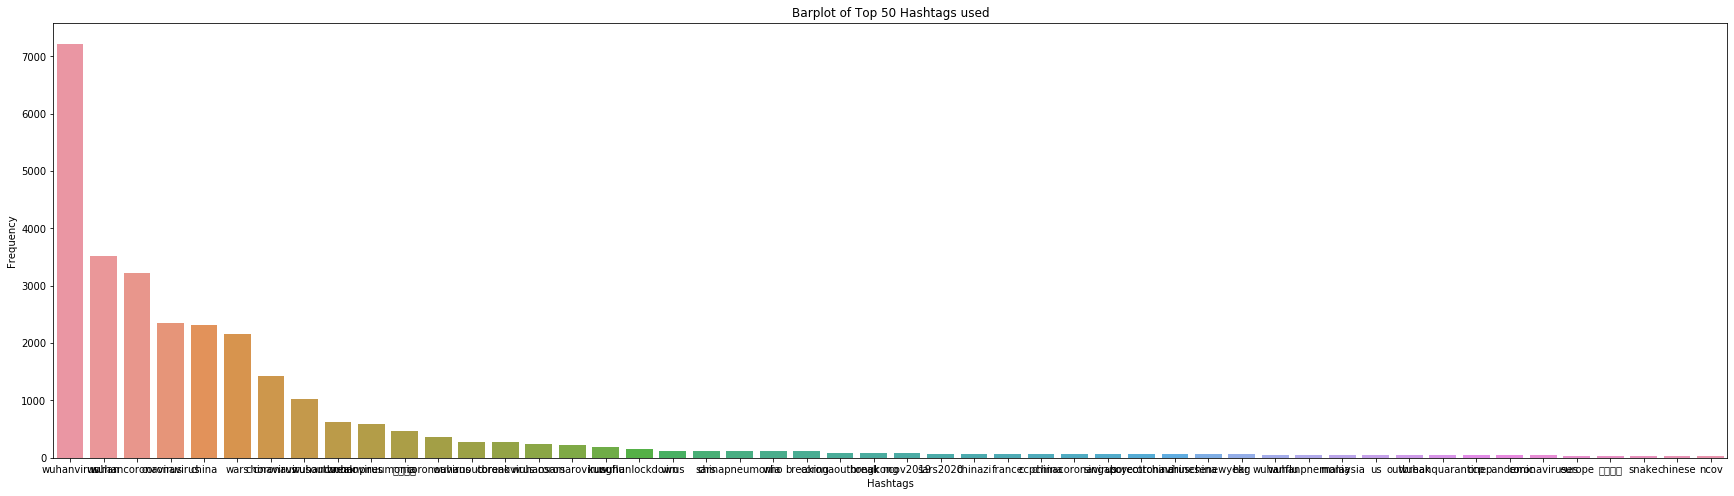

In [18]:
import seaborn as sns

# Define N to be the top number of hashtags
N = 50
top_hashtags = df_hashtag.groupby(['hashtags']).size().reset_index(name = 'counts').sort_values(by = 'counts', ascending = False).head(N)
print(top_hashtags)
# seaborn countplot on the top N hashtags
plt.figure(figsize=(30,8))
sns.set_palette('PuBuGn_d')
sns.barplot(x = 'hashtags', y = 'counts', data = top_hashtags)
plt.title('Barplot of Top ' + str(N) + ' Hashtags used')
plt.xlabel('Hashtags')
plt.ylabel('Frequency')
plt.show()

In [20]:
def isNaN(num):
    return num != num

def get_full_name(x):
    if x is None or isNaN(x):
        return None
    else:
        return x['full_name']
data['place_full_name']=data['place'].apply(lambda x: get_full_name(x))

data[data['place_full_name'].apply(lambda x: x is not None)]

,created_at,id,id_str,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,...,cleaned_text,location,acctdesc,neg,neu,pos,compound,numchars,numwords,place_full_name
18,2020-01-22 11:30:20+00:00,1219945388683268097,1219945388683268096,First US case of #WuhanCoronavirus confirmed 1...,False,"[0, 207]","{'hashtags': [{'text': 'WuhanCoronavirus', 'in...","<a href=""https://www.hootsuite.com"" rel=""nofol...",NaN,NaN,...,first case confirm cdc!\n\ndo still trust trus...,moon 🌕,"she changed to be cold, so that no one could h...",0.000,0.504,0.496,0.7840,53,9,"Washington, DC"
47,2020-01-22 14:17:37+00:00,1219987486186754048,1219987486186754048,Ready to go to #Walmart #ChinaVirus #nCoV htt...,False,"[0, 42]","{'hashtags': [{'text': 'Walmart', 'indices': [...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,...,ready go,"oakland, ca",#gsw#warriors#stephencurry#sc30 #standwith🇭🇰 🖐...,0.000,0.286,0.714,0.3612,8,2,"Beijing, People's Republic of China"
154,2020-01-22 21:16:58+00:00,1220093018713268228,1220093018713268224,Suspected 2019-nCoV patients are getting diagn...,False,"[0, 269]","{'hashtags': [{'text': 'wuhanvirus', 'indices'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,suspected patient get diagnosed regular pneumo...,,growing & healing,0.075,0.714,0.210,0.3400,147,22,"Manhattan, NY"
171,2020-01-22 22:08:31+00:00,1220105993218072577,1220105993218072576,"Meanwhile from 10am on Jan 23, no people in #...",False,"[0, 265]","{'hashtags': [{'text': 'Wuhan', 'indices': [45...","<a href=""http://twitter.com/download/android"" ...",1.220106e+18,1.220106e+18,...,meanwhile jan no people allow leave city trai...,waitingforuallthewayfromampang,too shy to talk 🤗\n\nwill wait for #ss8inkl 💙\...,0.167,0.739,0.094,-0.1280,114,18,"Lagos, Nigeria"
180,2020-01-22 23:45:19+00:00,1220130352443748353,1220130352443748352,"MRT stations in #Taipei, #Taiwan start to run ...",False,"[0, 218]","{'hashtags': [{'text': 'Taipei', 'indices': [1...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,mrt station start run alert remind passenger w...,malaysia,luna addict,0.000,0.690,0.310,0.6597,91,14,"Taipei City, Taiwan"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8331,2020-01-25 12:52:13+00:00,1221053157393883138,1221053157393883136,This is what flight HO1077 looked like this mo...,False,"[0, 175]","{'hashtags': [{'text': 'shanghai', 'indices': ...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,flight look like morning depart hongqiao intl ...,n.a,n.a,0.000,0.828,0.172,0.3612,88,13,"Guangdong, People's Republic of China"
8504,2020-01-25 13:38:43+00:00,1221064859191668738,1221064859191668736,Wuhan is going to build a dedicated 1000 bed h...,False,"[0, 216]","{'hashtags': [{'text': 'coronarovirus', 'indic...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,wuhan go build dedicate bed hospital infect go...,n.a,n.a,0.000,1.000,0.000,0.0000,95,15,"Hubei, People's Republic of China"
8641,2020-01-25 13:57:18+00:00,1221069535681355778,1221069535681355776,Two females (a chinese woman &amp; a sri lanka...,False,"[0, 232]","{'hashtags': [{'text': 'SriLanka', 'indices': ...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,two female chinese woman amp sri lankan phd st...,n.a,n.a,0.110,0.800,0.090,-0.1027,128,18,Sri Lanka
8654,2020-01-25 13:47:01+00:00,1221066948156350466,1221066948156350464,Can we just start calling the #coronavirus #Ku...,False,"[0, 64]","{'hashtags': [{'text': 'coronavirus', 'indices...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,...,start call,n.a,n.a,0.000,1.000,0.000,0.0000,10,2,"Edmonton, Alberta"


In [24]:
data[data['coordinates'].apply(lambda x: x is not None and not isNaN(x))]
# data['coordinates']

,created_at,id,id_str,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,...,cleaned_text,location,acctdesc,neg,neu,pos,compound,numchars,numwords,place_full_name
18,2020-01-22 11:30:20+00:00,1219945388683268097,1219945388683268096,First US case of #WuhanCoronavirus confirmed 1...,False,"[0, 207]","{'hashtags': [{'text': 'WuhanCoronavirus', 'in...","<a href=""https://www.hootsuite.com"" rel=""nofol...",NaN,NaN,...,first case confirm cdc!\n\ndo still trust trus...,moon 🌕,"she changed to be cold, so that no one could h...",0.0,0.504,0.496,0.784,53,9,"Washington, DC"
3114,2020-01-24 13:40:32+00:00,1220702929633542147,1220702929633542144,Flying to Hochiminh. Everyone on board is wear...,False,"[0, 159]","{'hashtags': [{'text': 'wuhanvirus', 'indices'...","<a href=""http://instagram.com"" rel=""nofollow"">...",NaN,NaN,...,fly hochiminh everyone board wear face mask ch...,n.a,n.a,0.0,1.000,0.000,0.000,84,11,"Sichuan, People's Republic of China"
4798,2020-01-24 19:47:11+00:00,1220795199040950273,1220795199040950272,#kungflu #coronavirus #chicago #officespace @ ...,False,"[0, 93]","{'hashtags': [{'text': 'kungflu', 'indices': [...","<a href=""http://instagram.com"" rel=""nofollow"">...",NaN,NaN,...,raleigh north carolina,n.a,n.a,0.0,1.000,0.000,0.000,22,3,"Raleigh, NC"
